## Importai

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import optimize

In [2]:
plt.rcParams["figure.figsize"] = (20,10)

# Funkcijų deklaravimas

In [39]:
# Vieno kintamojo funkcijos
def f1(x):
  return (x**6/6-x**3+2*x)

def f2(x):
  return (x + 1/(np.exp(x-1)-1))

def f3(x):
  return (x - np.sin(x))


# Dvieju kintamuju funkcijos
def f4(x):
  return x[0]**2 + x[1]**2

def f5(x):
  return x[0]**2+100*x[1]**2

def f6(x):
  return 100*(x[1]-x[0]**2)**2+(1-x[0])**2

def f7(x):
  return (np.sin(x[0]**2+3*x[1]**2+1))/(x[0]**2+3*x[1]**2+1)

def f8(x):
  return x * np.exp(-1*x[0]**2-x[1]**2)

# Pagalbinės funkcijos

In [4]:
def draw_single_functions(f, bound):
  inputs = np.arange(bound[0], bound[1], 0.00001)
  result = f(inputs)
  
  plt.plot(inputs, result)

In [5]:
def calc_single(f, bound):
  inputs = np.arange(bound[0], bound[1], 0.00001)
  result = f(inputs)
  
  #min = optimize.minimize_scalar(f1)
  min = optimize.minimize_scalar(f, method='bounded', bounds=(bound[0], bound[1]))
  plt.plot(inputs, result)
  y = f(min.x)
  #print(min.x, y)
  plt.plot([min.x], [min.fun], 's', color='r')
  

# Vieno kintamojo funkcijų minimumų paieška

https://stackoverflow.com/questions/56106295/scipy-optimize-minimize-is-not-giving-the-minimum-value-even-though-it-sees-that

In [18]:
optimize.basinhopping(f1, [-3.], stepsize=0.001)

                        fun: -1.0489222720185793
 lowest_optimization_result:       fun: -1.0489222720185793
 hess_inv: array([[1]])
      jac: array([2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([-0.76218559])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 966
                        nit: 100
                       njev: 322
                          x: array([-0.76218559])

In [20]:
optimize.basinhopping(f2, [-3.], stepsize=0.001)

                        fun: array([-3.5111162e+08])
 lowest_optimization_result:       fun: array([-3.5111162e+08])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-3.51111619e+08])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 348
                        nit: 100
                       njev: 116
                          x: array([-3.51111619e+08])

In [17]:
optimize.basinhopping(f3, [-3.], stepsize=0.001)


                        fun: array([-2.56293177e+08])
 lowest_optimization_result:       fun: array([-2.56293177e+08])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-2.56293177e+08])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 390
                        nit: 100
                       njev: 130
                          x: array([-2.56293177e+08])

# Vieno kintamojo funkcijų sekančio lokalaus minimumo paieška

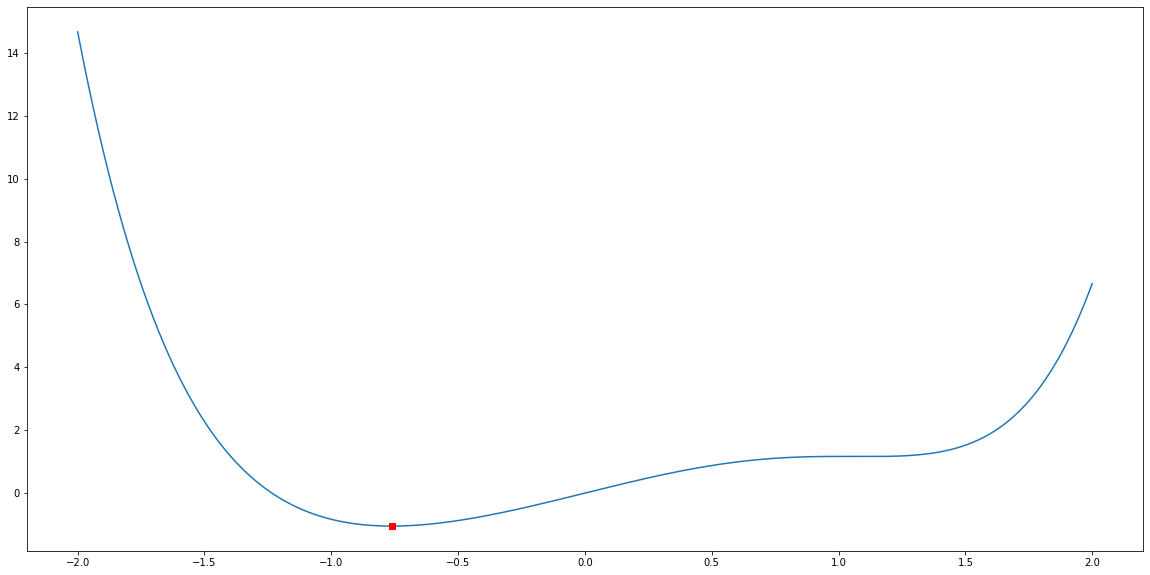

In [14]:
calc_single(f1, (-2,2))

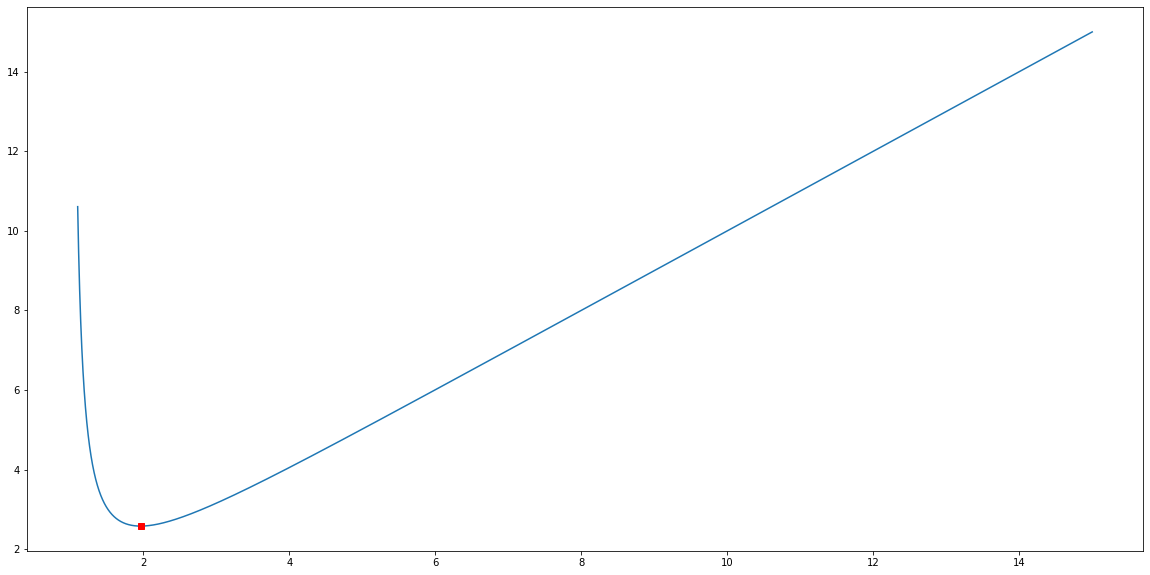

In [21]:
#optimize.minimize_scalar(f2, bracket=(1,100)) #options={'maxiter':10**100}
calc_single(f2, (1.1,15))

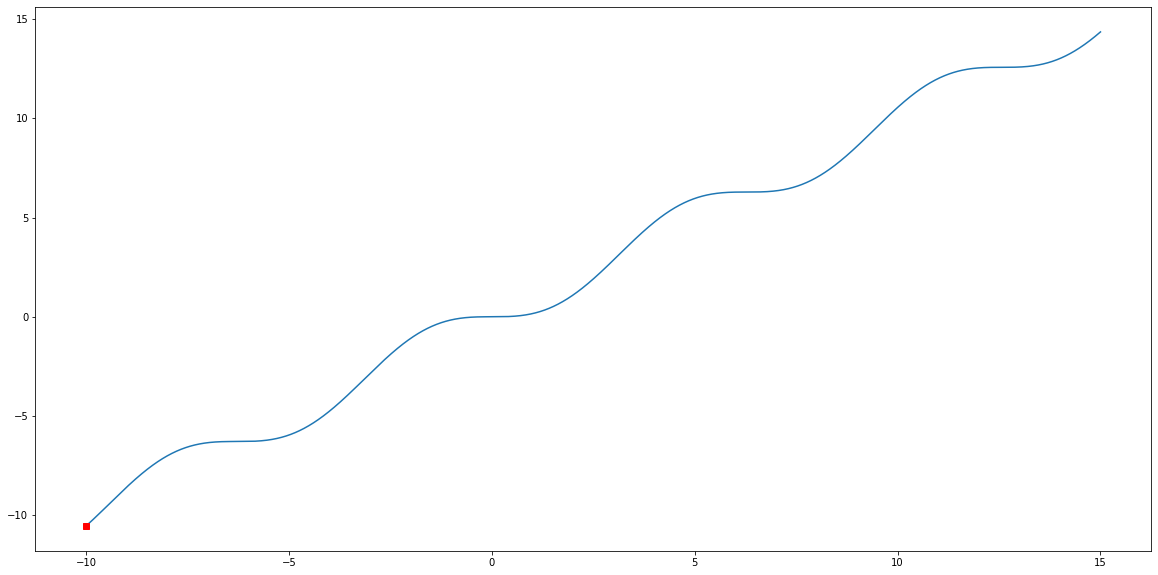

In [22]:
calc_single(f3,(-10,15))

## Vieno kintamojo funkcijai, daug kintamųjų procedura

In [22]:
x0 = [-10.]
optimize.minimize(f1, x0, method='CG')

     fun: 2563.158597398435
     jac: array([-3043.35140991])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 44
     nit: 1
    njev: 13
  status: 2
 success: False
       x: array([-4.95])

In [17]:
x0 = [-2.]
optimize.minimize(f1, x0, method='CG')

     fun: array([-1.04892227])
     jac: array([7.13765621e-06])
 message: 'Optimization terminated successfully.'
    nfev: 23
     nit: 2
    njev: 7
  status: 0
 success: True
       x: array([-0.76218446])

In [20]:
x0 = [1.]
optimize.minimize(f1, x0, method='CG')

     fun: array([1.16666667])
     jac: array([0.])
 message: 'Optimization terminated successfully.'
    nfev: 3
     nit: 0
    njev: 1
  status: 0
 success: True
       x: array([1.])

# Funkcijų sekančių lokalių minimumų paieška

In [6]:
ys = []
xs = []

lowerBound = -10

for upperBound in range(lowerBound+1, 10):
  m = optimize.minimize_scalar(f1, method='bounded', bounds=(lowerBound,upperBound))
  xs.append(m.x)
  ys.append(f1(m.x))

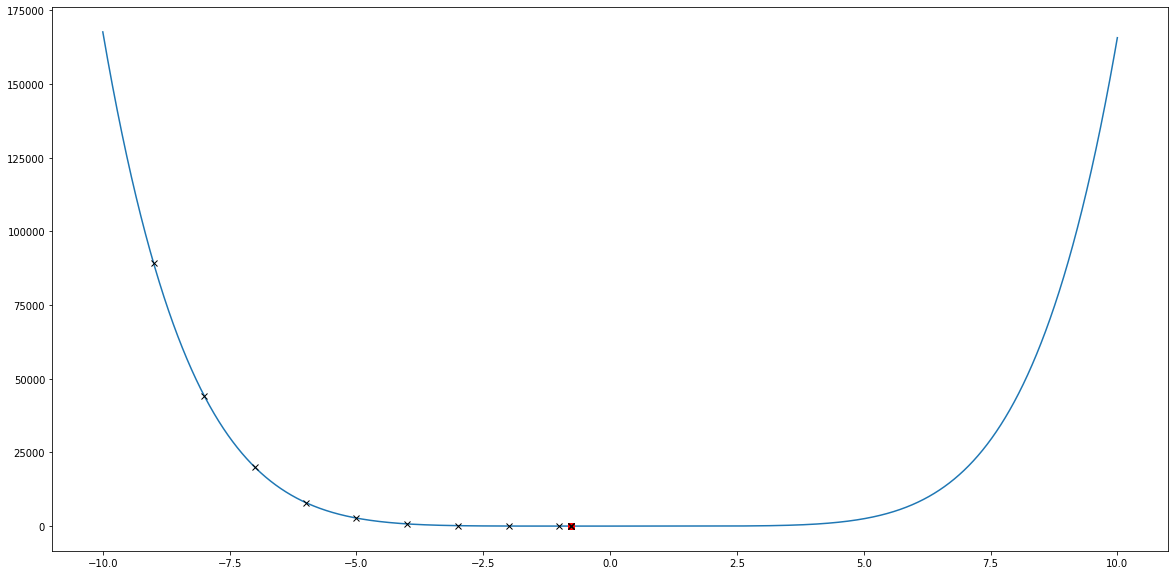

In [14]:
inputs = np.arange(-10,10, 0.00001)
result = f1(inputs)

plt.plot(inputs,result)

for x,y in zip(xs,ys):
  if y != min(ys):
    plt.plot([x], [y], 'x', color='k')
  else:
    plt.plot([x], [y], 's', color='r')



# Dviejų kintamųjų funkcijų atvaizdavimas

In [29]:
from mpl_toolkits.mplot3d import Axes3D

In [40]:
def viz_two_var(f):
  r_min, r_max = -5.0, 5.0

  xaxis = np.arange(r_min, r_max, .1)
  yaxis = np.arange(r_min, r_max, .1)

  x, y = np.meshgrid(xaxis, yaxis)
  results = f([x,y])

  fig = plt.figure()
  axis = fig.gca(projection='3d')
  axis.plot_surface(x,y, results, cmap='jet')

  plt.show()

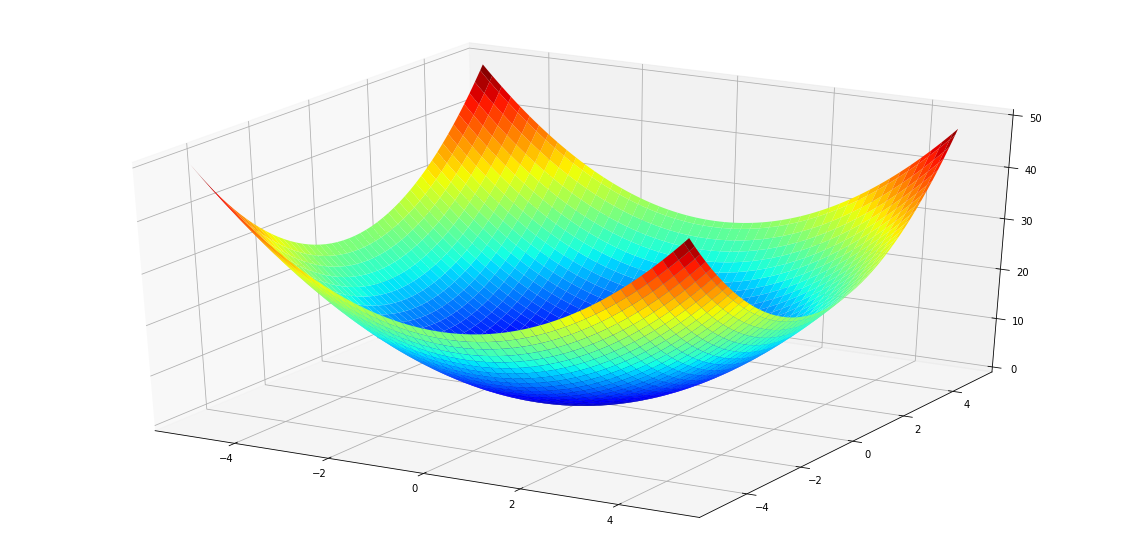

In [41]:
viz_two_var(f4)

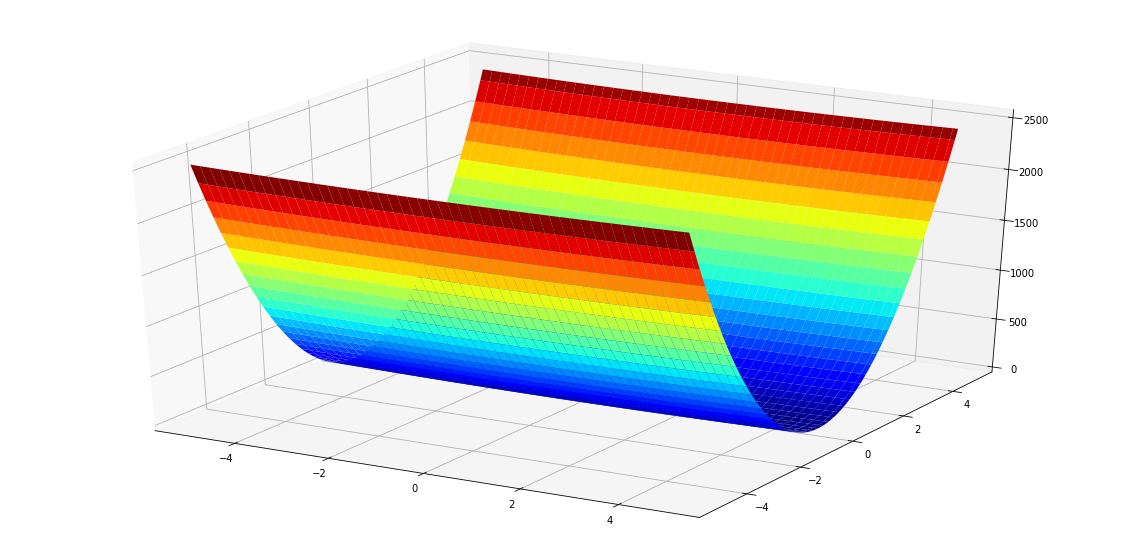

In [33]:
viz_two_var(f5)

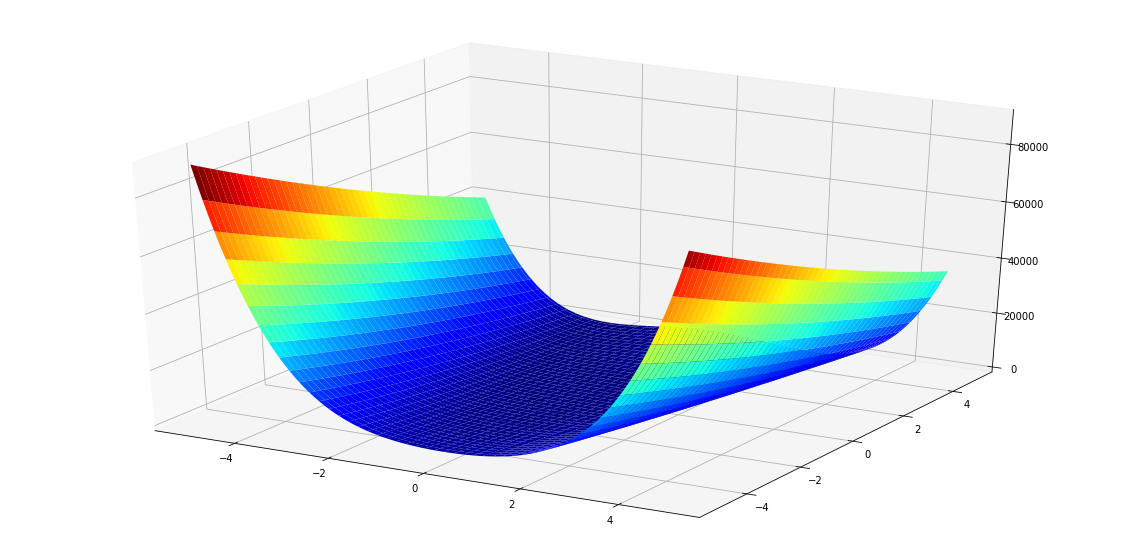

In [34]:
viz_two_var(f6)

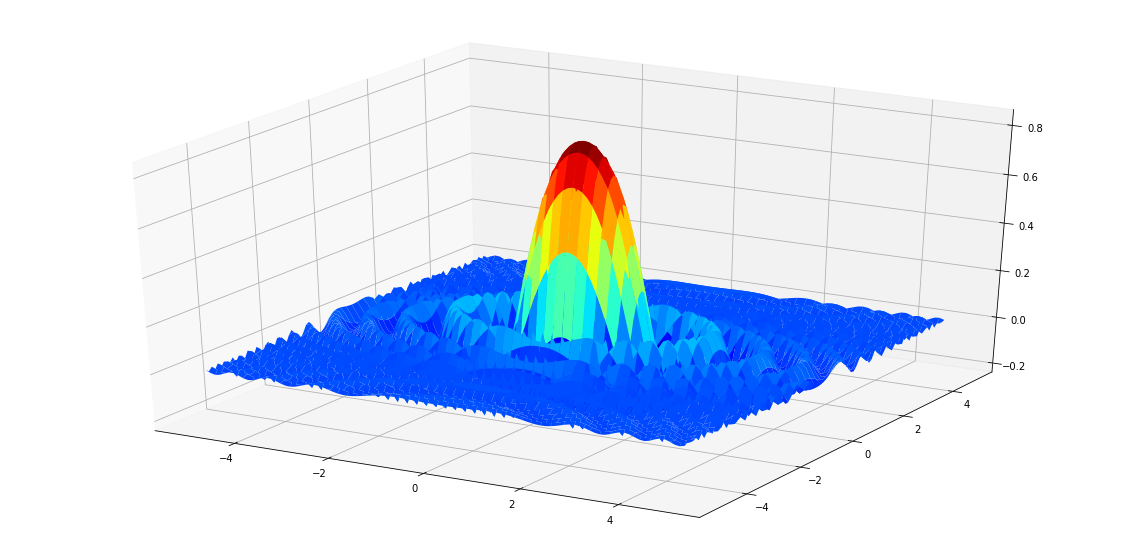

In [42]:
viz_two_var(f7)

In [36]:
viz_two_var(f8)

# Dviejų kintamųjų funkcijų minimizavimas

In [46]:
x0 = (-5.,-5.)
optimize.minimize(f4, x0, method='BFGS',options={'gtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 16
         Gradient evaluations: 4


      fun: 3.5538798158378284e-16
 hess_inv: array([[ 0.75, -0.25],
       [-0.25,  0.75]])
      jac: array([-1.17592212e-08, -1.17592203e-08])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([-1.33301912e-08, -1.33301907e-08])

In [47]:
optimize.minimize(f5, x0, method='BFGS',options={'gtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 36
         Gradient evaluations: 9


      fun: 7.914511840631906e-15
 hess_inv: array([[5.02352220e-01, 6.76466264e-05],
       [6.76466264e-05, 5.00194542e-03]])
      jac: array([-5.32957848e-08, -1.53271355e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([-3.40984730e-08, -8.21693737e-09])

In [48]:
optimize.minimize(f6, x0, method='BFGS',options={'gtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 73
         Function evaluations: 380
         Gradient evaluations: 95


      fun: 2.008050424092938e-11
 hess_inv: array([[0.499524  , 0.99902052],
       [0.99902052, 2.00294828]])
      jac: array([ 5.96685814e-07, -3.00811420e-07])
  message: 'Optimization terminated successfully.'
     nfev: 380
      nit: 73
     njev: 95
   status: 0
  success: True
        x: array([0.99999552, 0.99999103])

# Optimizavimo proceso vyksmas

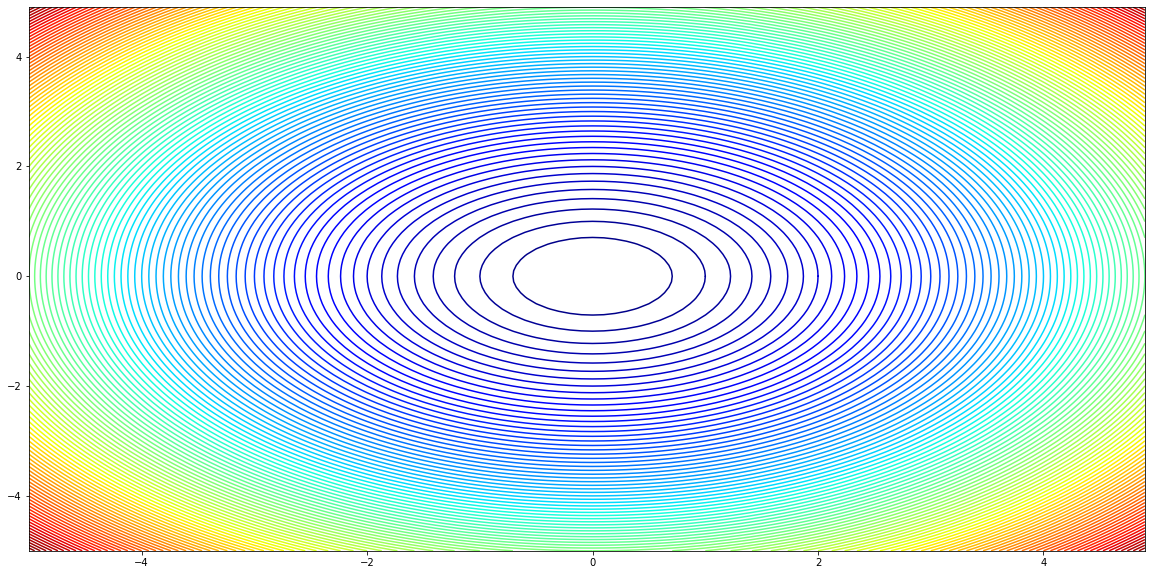

In [55]:
r_min, r_max = -5.0, 5.0

xaxis = np.arange(r_min, r_max, .1)
yaxis = np.arange(r_min, r_max, .1)

x, y = np.meshgrid(xaxis, yaxis)
results = f4([x,y])

plt.contour(x, y, results, levels=100, cmap='jet')

plt.show()

In [56]:
x0 = (-5.,-5.)
optima = optimize.minimize(f4, x0, method='BFGS',options={'gtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 16
         Gradient evaluations: 4


In [57]:
optima.x

array([-1.33301912e-08, -1.33301907e-08])

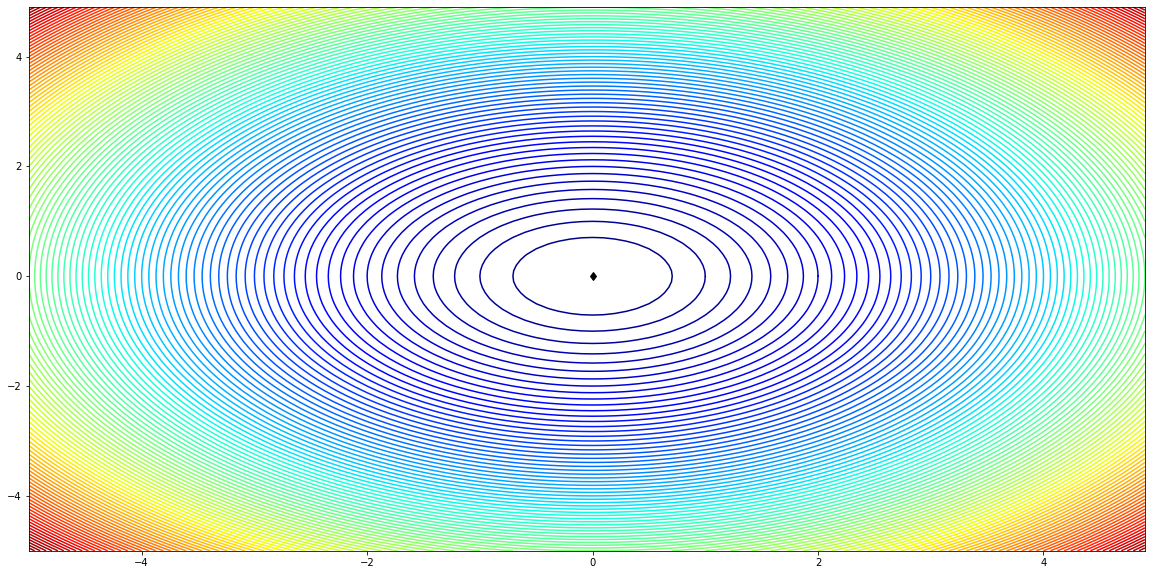

In [59]:
r_min, r_max = -5.0, 5.0

xaxis = np.arange(r_min, r_max, .1)
yaxis = np.arange(r_min, r_max, .1)

x, y = np.meshgrid(xaxis, yaxis)
results = f4([x,y])

plt.contour(x, y, results, levels=100, cmap='jet')

plt.plot([optima.x[0]], [optima.x[1]], 'd', color='k')

plt.show()

In [69]:
xs = []
ys = []
zs = []

x0 = np.array([-5.,5], dtype=np.double)

def callbackF(Xi):
  global xs, ys, zs

  xs.append(Xi[0])
  ys.append(Xi[1])
  zs.append(f4(Xi))

optima = optimize.minimize(f4, x0, method='BFGS', callback=callbackF,options={'gtol': 1e-6, 'disp': True})

optima.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 16
         Gradient evaluations: 4


array([-9.50580801e-08, -2.31853486e-07])

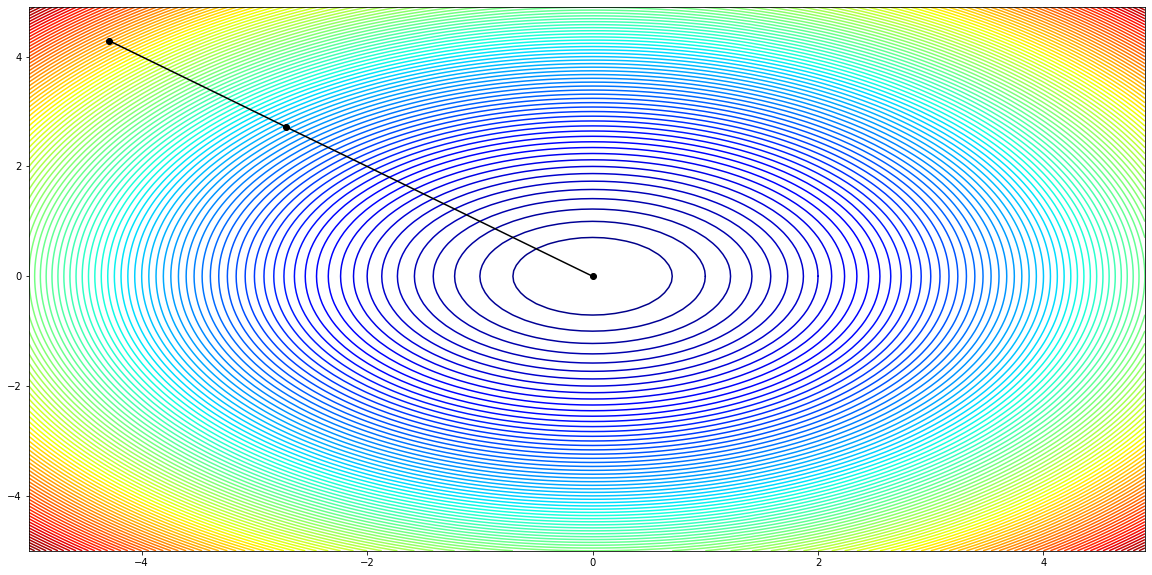

In [76]:
r_min, r_max = -5.0, 5.0

xaxis = np.arange(r_min, r_max, .1)
yaxis = np.arange(r_min, r_max, .1)

x, y = np.meshgrid(xaxis, yaxis)
results = f4([x,y])

plt.contour(x, y, results, levels=100, cmap='jet')

plt.plot(xs, ys, 'go-', color='k')

plt.show()